# Tensorflow Decision Forests

References
- https://substack.com/redirect/f92a3394-4ba0-46de-850b-46fbfa07e2fd?j=eyJ1IjoiZ3o2OXoifQ.eD3drYwi8N4WQMFVjqUvXwYHqAdLUSzYowEDrQzJe4Q
- https://www.tensorflow.org/decision_forests/tutorials/beginner_colab

In [7]:
# Run this to install the lib.
# !pip install tensorflow_decision_forests

In [5]:
import math
import os

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_decision_forests as tfdf

In [6]:
# Check the version of TensorFlow Decision Forests
print("Found TensorFlow Decision Forests v" + tfdf.__version__)

Found TensorFlow Decision Forests v1.2.0


## Training a Random Forest Model

In [9]:
!mkdir data
!curl https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv -o ./data/penguins.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15241  100 15241    0     0   6942      0  0:00:02  0:00:02 --:--:--  6968


In [12]:
dataset_df = pd.read_csv("./data/penguins.csv")
dataset_df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


In [24]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


We observe the following:
- the dataset contains a mix of numerical and categorical features
- there are 5 features with incomplete columns (`bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, `body_mass_g` and `sex`)


TF-DF supports all these feature type natively, therefore there is no need for preprocessing in the form of one-hot encoding, normalization of extra `is_present` feature.

However, since Keras metrics expects integers, the labels needs to be converted into integer. `pd_dataframe_to_tf_dataset` automatically converts the labels to integer.

In [23]:
# Print out info about objects.
dataset_df.describe(include="O")

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [31]:
# Splilt the dataset into training and testing dataset.


def split_dataset(dataset, test_ratio=0.30):
    """Splits a panda dataframe in two."""
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(dataset_df)
print(
    "{} examples in training, {} examples for testing".format(
        len(train_ds_pd), len(test_ds_pd)
    )
)

255 examples in training, 89 examples for testing


In [33]:
label = "species"

train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [35]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 4 thread(s) for training
Use /var/folders/7m/74_ct3hx33d878n626w1wxyc0000gn/T/tmp05v8ooiu as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'island': <tf.Tensor 'data_4:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_4:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'flipper_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>), 'body_mass_g': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_3:0' shape=(None,) dtype=float32>), 'sex': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data_5:0' shape=(None,) dtype=string>), 'year': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_4:0' shape=(None,) dtype=float32>)}
Training dataset read in 0:00:06.780670. Found 255 examples.
Training model...
Standard output detected as not 

[INFO 2023-02-24T15:07:47.504686+08:00 kernel.cc:756] Start Yggdrasil model training
[INFO 2023-02-24T15:07:47.508026+08:00 kernel.cc:757] Collect training examples
[INFO 2023-02-24T15:07:47.508145+08:00 kernel.cc:388] Number of batches: 1
[INFO 2023-02-24T15:07:47.50816+08:00 kernel.cc:389] Number of examples: 255
[INFO 2023-02-24T15:07:47.508316+08:00 kernel.cc:774] Training dataset:
Number of records: 255
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	1: "bill_depth_mm" NUMERICAL num-nas:2 (0.784314%) mean:17.2593 min:13.1 max:21.5 sd:1.98563
	2: "bill_length_mm" NUMERICAL num-nas:2 (0.784314%) mean:43.7379 min:33.5 max:54.2 sd:5.2196
	3: "body_mass_g" NUMERICAL num-nas:2 (0.784314%) mean:4165.22 min:2700 max:6000 sd:772.7
	4: "flipper_length_mm" NUMERICAL num-nas:2 (0.784314%) mean:200.289 min:172 max:230 sd:13.9403
	7: "year" NUMERICAL mean:2008 min:2007 max:2009 sd:0.7995

CATEGORICAL: 3 (37.5%)
	0: 

Model trained in 0:00:00.282834
Compiling model...
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [36]:
model_1.compile(metrics=["accuracy"])

In [37]:
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
    print(f"{name}: {value:.4f}")

1/1 [==============================] - 3s 3s/step - loss: 0.0000e+00 - accuracy: 0.9888

loss: 0.0000
accuracy: 0.9888


In [38]:
model_1.save("./model")

INFO:tensorflow:Assets written to: ./model/assets


INFO:tensorflow:Assets written to: ./model/assets


## Plot the model

Plotting a decision tree.

In [45]:
with open("plot.html", "w") as f:
    f.write(tfdf.model_plotter.plot_model(model_1, tree_idx=0, max_depth=3))

In [46]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "bill_length_mm"  0.433414 ################
    2. "flipper_length_mm"  0.413256 ##############
    3.     "bill_depth_mm"  0.327793 #######
    4.            "island"  0.307764 ######
    5.       "body_mass_g"  0.261758 ##
    6.               "sex"  0.234458 
    7.              "year"  0.232359 

Variable Importance: NUM_AS_ROOT:
    1. "flipper_length_mm" 141.000000 ################
    2.    "bill_length_mm" 84.000000 #########
    3.     "bill_depth_mm" 67.000000 #######
   

In [47]:
# The input features.
model_1.make_inspector().features()

["bill_depth_mm" (1; #1),
 "bill_length_mm" (1; #2),
 "body_mass_g" (1; #3),
 "flipper_length_mm" (1; #4),
 "island" (4; #5),
 "sex" (4; #6),
 "year" (1; #7)]

In [48]:
# The feature importances.
model_1.make_inspector().variable_importances()

{'NUM_NODES': [("bill_length_mm" (1; #2), 700.0),
  ("bill_depth_mm" (1; #1), 455.0),
  ("flipper_length_mm" (1; #4), 358.0),
  ("island" (4; #5), 310.0),
  ("body_mass_g" (1; #3), 275.0),
  ("sex" (4; #6), 34.0),
  ("year" (1; #7), 16.0)],
 'NUM_AS_ROOT': [("flipper_length_mm" (1; #4), 141.0),
  ("bill_length_mm" (1; #2), 84.0),
  ("bill_depth_mm" (1; #1), 67.0),
  ("island" (4; #5), 5.0),
  ("body_mass_g" (1; #3), 3.0)],
 'INV_MEAN_MIN_DEPTH': [("bill_length_mm" (1; #2), 0.43341353255698634),
  ("flipper_length_mm" (1; #4), 0.41325608613221976),
  ("bill_depth_mm" (1; #1), 0.3277930681305042),
  ("island" (4; #5), 0.3077635174943425),
  ("body_mass_g" (1; #3), 0.261758426124752),
  ("sex" (4; #6), 0.23445836152941973),
  ("year" (1; #7), 0.2323586486821575)],
 'SUM_SCORE': [("bill_length_mm" (1; #2), 27376.301516973414),
  ("flipper_length_mm" (1; #4), 22801.028990549967),
  ("bill_depth_mm" (1; #1), 13272.478498751298),
  ("island" (4; #5), 10752.762287171558),
  ("body_mass_g" (1; 

In [50]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=255, accuracy=0.9803921568627451, loss=0.21627223135574775, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Text(0, 0.5, 'Logloss (out-of-bag)')

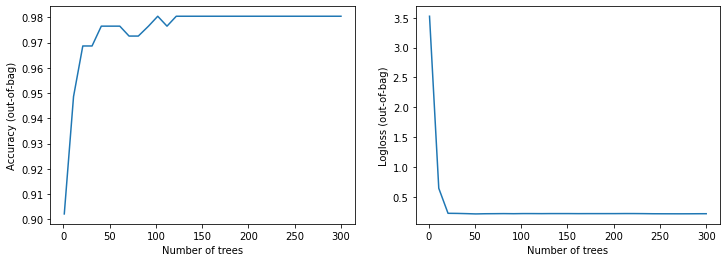

In [53]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

## Re-train the model with a different learning algorithm

In [54]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [56]:
tfdf.keras.RandomForestModel?

Init signature: tfdf.keras.RandomForestModel(*args, **kwargs)
Docstring:     
Random Forest learning algorithm.

A Random Forest (https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)
is a collection of deep CART decision trees trained independently and without
pruning. Each tree is trained on a random subset of the original training 
dataset (sampled with replacement).

The algorithm is unique in that it is robust to overfitting, even in extreme
cases e.g. when there are more features than training examples.

It is probably the most well-known of the Decision Forest training
algorithms.

Usage example:

```python
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("project/dataset.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="my_label")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())
```

Hyper-parameter tuning:

```python
import tensorflow_decision_forests as tfdf
import pandas a

## Using a subset of features

In [57]:
feature_1 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_2 = tfdf.keras.FeatureUsage(name="island")

all_features = [feature_1, feature_2]

# NOTE: This model is only trained with two features, it will not be as good as the one trained with all features.
model_2 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True
)

model_2.compile(metrics=["accuracy"])
model_2.fit(train_ds, validation_data=test_ds)
print(model_2.evaluate(test_ds, return_dict=True))

Use /var/folders/7m/74_ct3hx33d878n626w1wxyc0000gn/T/tmpq48kyasf as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.633888. Found 255 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(89, shape=(), dtype=int32)
Validation dataset read in 0:00:00.392211. Found 89 examples.
Training model...
Model trained in 0:00:00.164595
Compiling model...


2023-02-24 15:23:17.330627: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1790] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2023-02-24 15:23:17.330686: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1800] "goss_beta" set but "sampling_method" not equal to "GOSS".
2023-02-24 15:23:17.330697: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1814] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 2023-02-24T15:23:17.460049+08:00 kernel.cc:1214] Loading model from path /var/folders/7m/74_ct3hx33d878n626w1wxyc0000gn/T/tmpq48kyasf/model/ with prefix 03bccd2048b14769
[INFO 2023-02-24T15:23:17.473314+08:00 decision_forest.cc:661] Model loaded with 111 root(s), 3369 node(s), and 2 input feature(s).
[INFO 2023-02-24T15:23:17.473367+08:00 abstract_model.cc:1312] Engine "GradientBoostedTree

Model compiled.
1/1 [==============================] - 0s 80ms/step - loss: 0.0000e+00 - accuracy: 0.9438
{'loss': 0.0, 'accuracy': 0.9438202381134033}


## Specifying Semantics

In [58]:
feature_1 = tfdf.keras.FeatureUsage(
    name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL
)
feature_2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_3 = tfdf.keras.FeatureUsage(name="sex")
all_features = [feature_1, feature_2, feature_3]

model_3 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True
)
model_3.compile(metrics=["accuracy"])

model_3.fit(train_ds, validation_data=test_ds)

Use /var/folders/7m/74_ct3hx33d878n626w1wxyc0000gn/T/tmpi_j53koi as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.534937. Found 255 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(89, shape=(), dtype=int32)
Validation dataset read in 0:00:00.288541. Found 89 examples.
Training model...
Model trained in 0:00:00.144988
Compiling model...


2023-02-24 15:24:40.107312: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1790] "goss_alpha" set but "sampling_method" not equal to "GOSS".
2023-02-24 15:24:40.107336: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1800] "goss_beta" set but "sampling_method" not equal to "GOSS".
2023-02-24 15:24:40.107344: W external/ydf/yggdrasil_decision_forests/learner/gradient_boosted_trees/gradient_boosted_trees.cc:1814] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 2023-02-24T15:24:40.242853+08:00 kernel.cc:1214] Loading model from path /var/folders/7m/74_ct3hx33d878n626w1wxyc0000gn/T/tmpi_j53koi/model/ with prefix 8832e6c7a0964f10
[INFO 2023-02-24T15:24:40.247411+08:00 decision_forest.cc:661] Model loaded with 39 root(s), 1299 node(s), and 3 input feature(s).
[INFO 2023-02-24T15:24:40.247467+08:00 abstract_model.cc:1312] Engine "GradientBoostedTrees

Model compiled.


In [59]:
# The hyper-parameter templates of the Gradient Boosted Tree model.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]
